In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Model
from keras.layers import Input,Dense,Flatten,Reshape
from keras.datasets import mnist
from keras.optimizers import Adam
import cv2

In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255.0 
x_test = x_test/255.0 

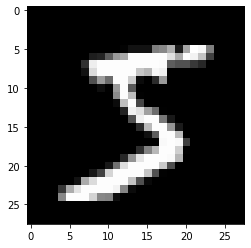

In [3]:
plt.imshow(x_train[0], cmap="gray")

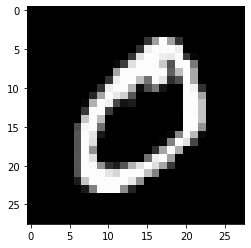

In [4]:
plt.imshow(x_train[1], cmap="gray")

In [5]:
x_train[0].shape

(28, 28)

In [6]:
encoder_input = Input(shape=(28, 28, 1), name='img')
x = Flatten()(encoder_input)
encoder_output = Dense(64, activation="relu")(x)
encoder = Model(encoder_input, encoder_output, name='encoder')
decoder_input = Dense(64, activation="relu")(encoder_output)
x = Dense(784, activation="relu")(decoder_input) 
decoder_output = Reshape((28, 28, 1))(x)
opt = Adam(lr=0.001, decay=1e-6)

In [7]:
autoencoder = Model(encoder_input, decoder_output, name='autoencoder')

In [8]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 784)               50960     
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
Total params: 105,360
Trainable params: 105,360
Non-trainable params: 0
_________________________________________________

In [9]:
autoencoder.compile(opt, loss='mse')

In [10]:
history = autoencoder.fit(x_train,x_train,epochs=100, batch_size=32, validation_split=0.10 )

Epoch 1/100
1688/1688 [==============================] - 5s 2ms/step - loss: 0.0314 - val_loss: 0.0140
Epoch 2/100
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0133 - val_loss: 0.0125
Epoch 3/100
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0123 - val_loss: 0.0119
Epoch 4/100
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0119 - val_loss: 0.0117
Epoch 5/100
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0116 - val_loss: 0.0117
Epoch 6/100
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0115 - val_loss: 0.0116
Epoch 7/100
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0115 - val_loss: 0.0112
Epoch 8/100
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0111 - val_loss: 0.0112
Epoch 9/100
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0111 - val_loss: 0.0112
Epoch 10/100
1688/1688 [==============================] - 3s 2ms/step - l

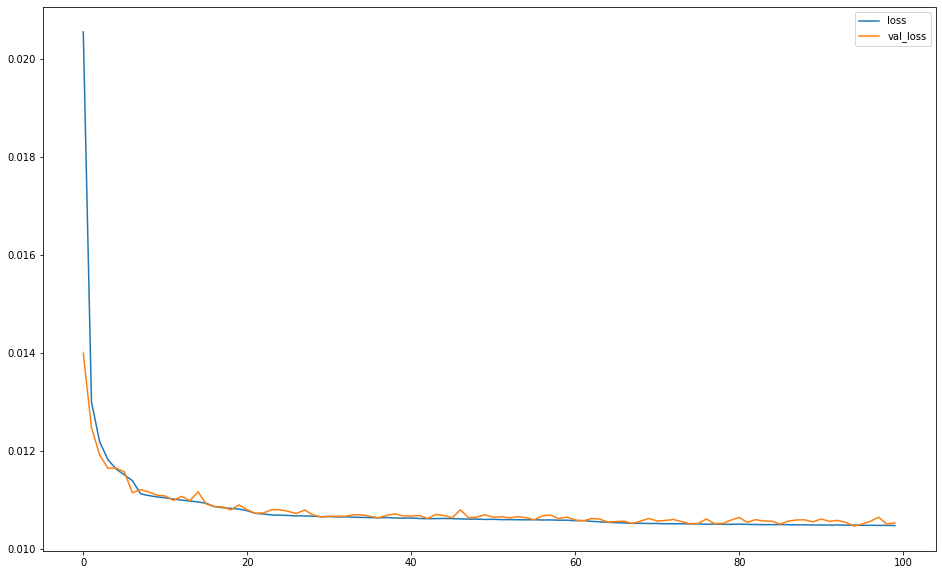

In [11]:
history=pd.DataFrame(history.history)
history.plot(figsize=(16,10))

In [12]:
example = encoder.predict([ x_test[0].reshape(-1, 28, 28, 1) ])

In [13]:
print(example[0].shape)
print(example[0])

(64,)
[1.6225708  1.5220733  2.024408   0.7571401  0.         0.653636
 0.35433292 0.68050766 0.7987205  0.8507085  1.5922581  0.5082049
 2.1137788  0.2910179  0.5471906  1.3018699  0.91408944 0.46017277
 0.         1.451652   0.7307642  0.7659637  0.571785   1.0072689
 0.45836622 0.28206348 0.         0.67702526 2.0430918  1.494662
 0.36278114 1.7095569  0.45008233 0.9501813  1.7558467  0.3072954
 0.63628936 1.03131    3.5042682  1.0212511  0.83454555 1.7245982
 2.523524   1.111186   0.6239486  2.910634   0.         0.
 1.6003249  1.1625733  0.2658943  1.4486437  1.6723976  2.2105305
 1.8127978  1.4091725  0.5249502  1.9184961  0.94215    2.069564
 0.         1.1146244  1.5428814  0.7133487 ]


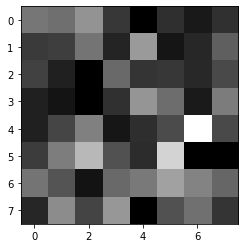

In [14]:
plt.imshow(example[0].reshape((8,8)), cmap="gray")

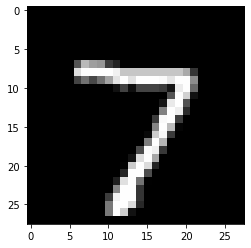

In [15]:
plt.imshow(x_test[0], cmap="gray")

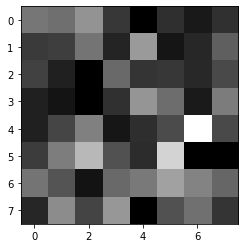

In [16]:
plt.imshow(example[0].reshape((8,8)), cmap="gray")

In [17]:
ae_out = autoencoder.predict([ x_test[0].reshape(-1, 28, 28, 1) ])
img = ae_out[0] 

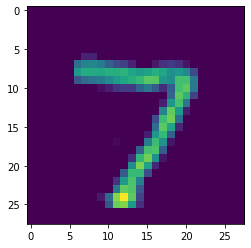

In [18]:
plt.imshow(img.reshape(28,28))

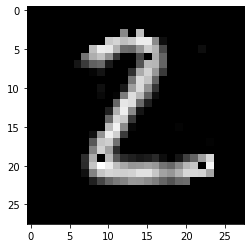

In [19]:
ae_out = autoencoder.predict([ x_test[1].reshape(-1, 28, 28, 1) ])
img = ae_out[0] 
plt.imshow(ae_out[0].reshape(28,28), cmap="gray")

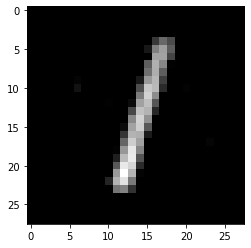

In [20]:
ae_out = autoencoder.predict([ x_test[2].reshape(-1, 28, 28, 1) ])
img = ae_out[0] 
plt.imshow(ae_out[0].reshape(28,28), cmap="gray")